Data preprocessing

In [61]:
#Load data set

import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("final_modeling_dataset.csv")



In [62]:
df.head()

,periodname,week_start,week_end,Combined_positive,temp_c,rh_pct,rain_mm,wind10_kmh,soil_moisture_top_m3m3
0,Week 1 2018-12-31 - 2019-01-06,2018-12-31,2019-01-06,66.0,30.115476,38.166667,0.0,20.397024,0.027899
1,Week 2 2019-01-07 - 2019-01-13,2019-01-07,2019-01-13,110.0,30.488690,24.785714,0.0,20.902381,0.025518
2,Week 3 2019-01-14 - 2019-01-20,2019-01-14,2019-01-20,73.0,30.727381,31.047619,0.0,15.034524,0.021024
3,Week 4 2019-01-21 - 2019-01-27,2019-01-21,2019-01-27,70.0,31.342857,28.553571,0.0,19.123810,0.019250
4,Week 5 2019-01-28 - 2019-02-03,2019-01-28,2019-02-03,48.0,31.215476,28.142857,0.0,21.282738,0.021952


In [63]:
#step 3: understand the dataset
print("Shape of dataset:", df.shape) #shape of dataset

print("\nColumn names:", df.columns.tolist()) #column names

print(df.isna().sum()) #check for missing values

Shape of dataset: (349, 9)

Column names: ['periodname', 'week_start', 'week_end', 'Combined_positive', 'temp_c', 'rh_pct', 'rain_mm', 'wind10_kmh', 'soil_moisture_top_m3m3']
periodname                0
week_start                0
week_end                  0
Combined_positive         0
temp_c                    0
rh_pct                    0
rain_mm                   0
wind10_kmh                0
soil_moisture_top_m3m3    0
dtype: int64


In [64]:

# Step 4: Parse date columns and sort by week_start

# Convert 'week_start' and 'week_end' to datetime
df['week_start'] = pd.to_datetime(df['week_start'], errors='coerce')
df['week_end'] = pd.to_datetime(df['week_end'], errors='coerce')

# Sort the dataset by week_start
df = df.sort_values('week_start').reset_index(drop=True)

# Check the date range after sorting
print("Date range:", df['week_start'].min(), "to", df['week_start'].max())

# Preview the first few rows after sorting
print(df.head())


Date range: 2018-12-31 00:00:00 to 2025-09-01 00:00:00
                       periodname week_start   week_end  Combined_positive  \
0  Week 1 2018-12-31 - 2019-01-06 2018-12-31 2019-01-06               66.0   
1  Week 2 2019-01-07 - 2019-01-13 2019-01-07 2019-01-13              110.0   
2  Week 3 2019-01-14 - 2019-01-20 2019-01-14 2019-01-20               73.0   
3  Week 4 2019-01-21 - 2019-01-27 2019-01-21 2019-01-27               70.0   
4  Week 5 2019-01-28 - 2019-02-03 2019-01-28 2019-02-03               48.0   

      temp_c     rh_pct  rain_mm  wind10_kmh  soil_moisture_top_m3m3  
0  30.115476  38.166667      0.0   20.397024                0.027899  
1  30.488690  24.785714      0.0   20.902381                0.025518  
2  30.727381  31.047619      0.0   15.034524                0.021024  
3  31.342857  28.553571      0.0   19.123810                0.019250  
4  31.215476  28.142857      0.0   21.282738                0.021952  


In [65]:

#Count and preview exact duplicate rows (all columns identical)
n_exact_dups = df.duplicated().sum()
print(f"Exact duplicate rows: {n_exact_dups}")


Exact duplicate rows: 0


In [66]:
#checking basic consistency
# 1) Weekly span should be ~7 days (6-day difference if inclusive bounds)
span_days = (df['week_end'] - df['week_start']).dt.days
print("Weekly span stats (days):", span_days.min(), span_days.max())

# 2) No negative physical values
for col in ['Combined_positive', 'rain_mm', 'temp_c', 'rh_pct', 'wind10_kmh', 'soil_moisture_top_m3m3']:
    if col in df.columns:
        n_neg = (df[col] < 0).sum()
        if n_neg > 0:
            print(f"WARNING: {col} has {n_neg} negative values.")

# 3) RH expected range 0–100, quick sanity check
if 'rh_pct' in df.columns:
    out_of_range = ((df['rh_pct'] < 0) | (df['rh_pct'] > 100)).sum()
    if out_of_range > 0:
        print(f"WARNING: rh_pct has {out_of_range} values outside [0,100].")


Weekly span stats (days): 6 6


EDA

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    import seaborn as sns
    sns.set_theme(style="whitegrid")
except Exception:
    sns = None

#columns for EDA
value_col = "Combined_positive"
weather_cols = ["temp_c", "rh_pct","rain_mm", "wind10_kmh","soil_moisture_top_m3m3"]

In [68]:
#descriptive stats

numeric_cols = df.select_dtypes(include=[np.number]).columns
desc = df[numeric_cols].describe().T
desc


,count,mean,std,min,25%,50%,75%,max
Combined_positive,349.0,1636.773639,1878.909386,4.000000,292.000000,1002.000000,2208.000000,9984.000000
temp_c,349.0,28.908608,1.928113,24.203571,27.629167,29.223214,30.275595,32.955357
rh_pct,349.0,48.173540,13.945781,24.785714,37.839286,45.011905,58.250000,81.017857
rain_mm,349.0,11.128367,16.680830,0.000000,0.200000,2.700000,15.900000,82.900000
wind10_kmh,349.0,12.679747,3.484710,5.732143,9.997024,12.242857,14.794643,25.648810
soil_moisture_top_m3m3,349.0,0.052859,0.043672,0.000077,0.026214,0.033310,0.064625,0.224607


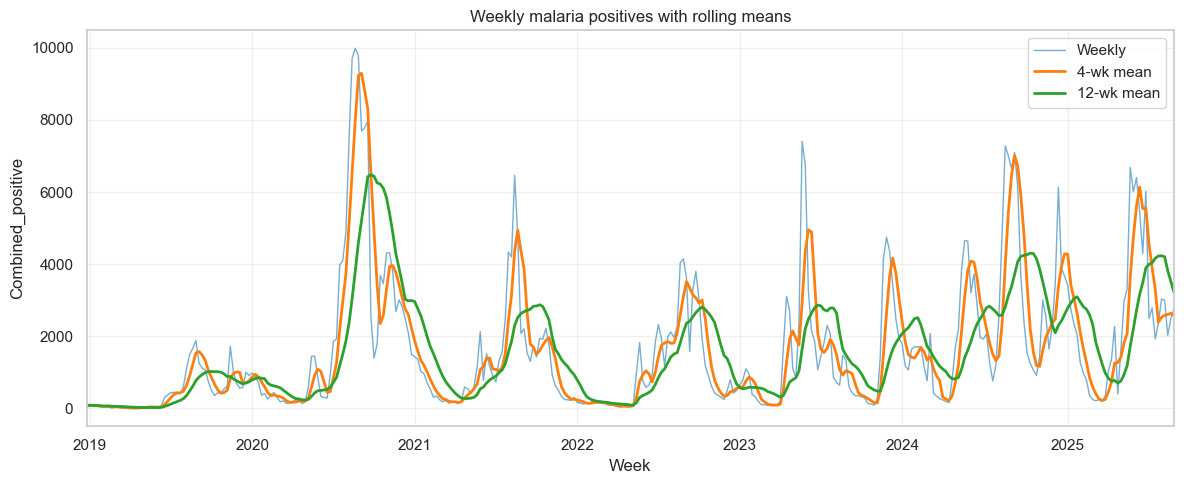

In [69]:
#check trends for malaria

#creates base plot
ax = df.plot(x='week_start', y=value_col, figsize=(12,5), lw=1, alpha=0.6, color='tab:blue', label='Weekly')

df_rolling =df.assign(r4=df[value_col].rolling(4, min_periods=1).mean(),
          r12=df[value_col].rolling(12, min_periods=1).mean()) 

#plots the rolling means for new Dataframe
df_rolling.plot(x='week_start', y='r4', ax=ax, lw=2, color='tab:orange', label='4-wk mean')
df_rolling.plot(x='week_start', y='r12', ax=ax, lw=2, color='tab:green', label='12-wk mean')
ax.set_title('Weekly malaria positives with rolling means')
ax.set_xlabel('Week'); ax.set_ylabel(value_col); ax.grid(True, alpha=.3)
plt.tight_layout()
plt.show()


### Summary of Malaria Trend Graph
Weekly malaria positive cases from 2019 to 2025, with rolling averages (4-week and 12-week) to smooth short-term and long-term trends.

Key observations:
* Seasonal peaks occur almost every year, indicating predictable malaria transmission cycles.
* Highest spikes appear around mid-2020 and mid-2023, suggesting outbreak periods.
* The 12-week rolling mean (green) highlights a gradual upward trend in recent years, signaling a possible increase in baseline transmission.

Implications for programs:
* Early warning: Peaks align with seasonal patterns, so interventions (e.g., IRS, LLIN distribution) should be timed before these periods.
* Resource allocation: Sustained upward trend suggests the need for strengthened surveillance and preventive measures.

For the model: This trend data is crucial for **time-series**  features and **seasonality** adjustments in predictive modeling.

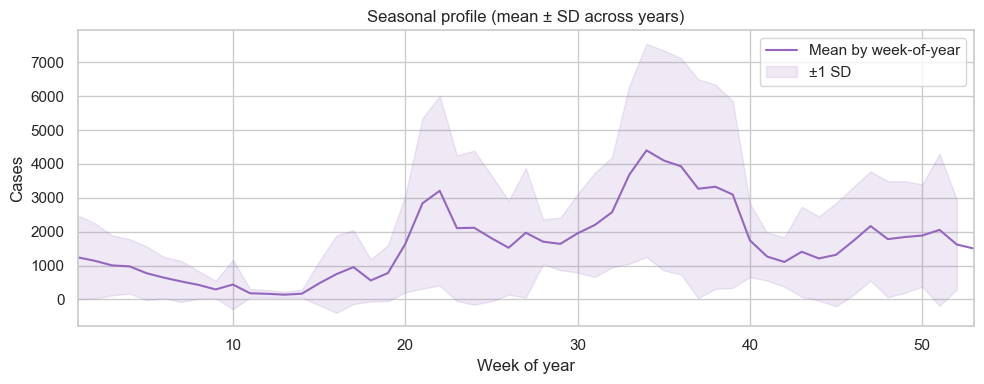

In [70]:
#checking seasonality

df['woy'] = df['week_start'].dt.isocalendar().week.astype(int)
seasonal = df.groupby('woy')[value_col].agg(['mean','median','std','count']).reset_index()

plt.figure(figsize=(10,4))
plt.plot(seasonal['woy'], seasonal['mean'], color='tab:purple', label='Mean by week-of-year')
plt.fill_between(seasonal['woy'],
                 seasonal['mean']-seasonal['std'],
                 seasonal['mean']+seasonal['std'],
                 color='tab:purple', alpha=0.15, label='±1 SD')
plt.xlim(1,53); plt.xlabel('Week of year'); plt.ylabel('Cases')
plt.title('Seasonal profile (mean ± SD across years)')
plt.legend(); plt.tight_layout(); plt.show()


### Seasonal Profile Graph
This shows the average malaria cases by week of the year across multiple years, with ±1 standard deviation to indicate variability.

Key observations:
* Two major seasonal peaks: around week 20 (May) and week 33 (August).
* The shaded band (±1 SD) shows high variability during peak weeks, meaning some years have much higher spikes than others.

Implications for programs:
* Targeted interventions (e.g., IRS, LLIN distribution, health messaging) should be prioritized before weeks 20 and 40.
* Variability suggests the need for flexible response plans during peak seasons.

For the model: This **confirms strong seasonality**, which should be incorporated as a key feature (e.g., week-of-year, lag variables).

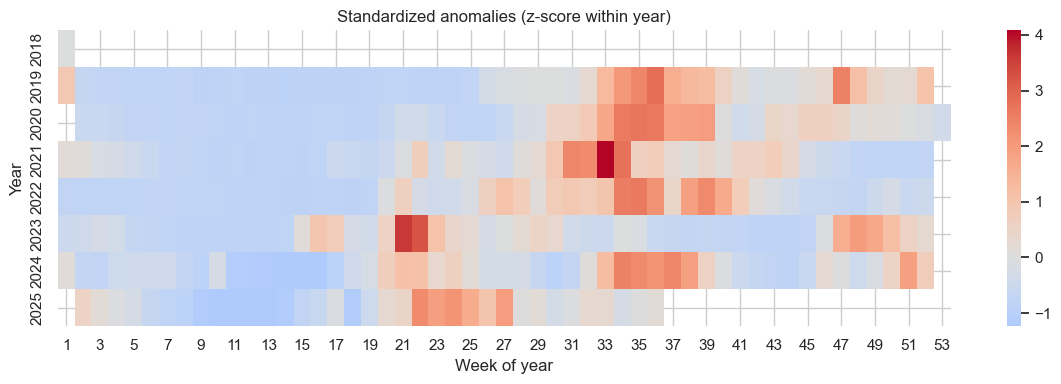

In [71]:
# show offseason peaks throughout a standardised year
df['year'] = df['week_start'].dt.year
z = df.copy()
z['cases_z'] = z.groupby('year')[value_col]\
                .transform(lambda s: (s - s.mean()) / (s.std(ddof=0) + 1e-9))
pivot = z.pivot_table(index='year', columns='woy', values='cases_z', aggfunc='mean')

if sns is not None:
    plt.figure(figsize=(12,4))
    sns.heatmap(pivot, cmap='coolwarm', center=0)
    plt.title('Standardized anomalies (z-score within year)')
    plt.xlabel('Week of year'); plt.ylabel('Year')
    plt.tight_layout(); plt.show()
else:
    display(pivot.head())


### Summary of Anomaly Heatmap
This shows a standardised heatmap of anomalies (z-scores) of malaria cases by week of the year across 2018–2025.

Key observations:
* Red zones indicate weeks with much higher-than-normal cases, while blue zones indicate lower-than-normal.
* Consistent high anomalies appear around weeks 20 and 33, confirming strong seasonal peaks.
* Some years (e.g., 2020, 2023) show intense red clusters, aligning with outbreak years seen in the trend graph.

Implications for programs:
* Early detection: Monitoring anomalies can help trigger rapid response before outbreaks escalate.
* Predictive modeling: Anomaly patterns strengthen the case for including seasonality and lagged features in the model.

For decision-making: This heatmap is a visual early warning tool for identifying unusual malaria activity.

In [72]:
# Correlation and the effect of lags weather data

cols = [c for c in [value_col] + weather_cols if c in df.columns]
cmat = df[cols].corr(method='pearson')
cmat


,Combined_positive,temp_c,rh_pct,rain_mm,wind10_kmh,soil_moisture_top_m3m3
Combined_positive,1.000000,-0.097409,0.032762,-0.004549,-0.218727,0.026845
temp_c,-0.097409,1.000000,-0.900250,-0.696604,0.674034,-0.780325
rh_pct,0.032762,-0.900250,1.000000,0.741144,-0.659158,0.795378
rain_mm,-0.004549,-0.696604,0.741144,1.000000,-0.510401,0.758104
wind10_kmh,-0.218727,0.674034,-0.659158,-0.510401,1.000000,-0.620223
soil_moisture_top_m3m3,0.026845,-0.780325,0.795378,0.758104,-0.620223,1.000000


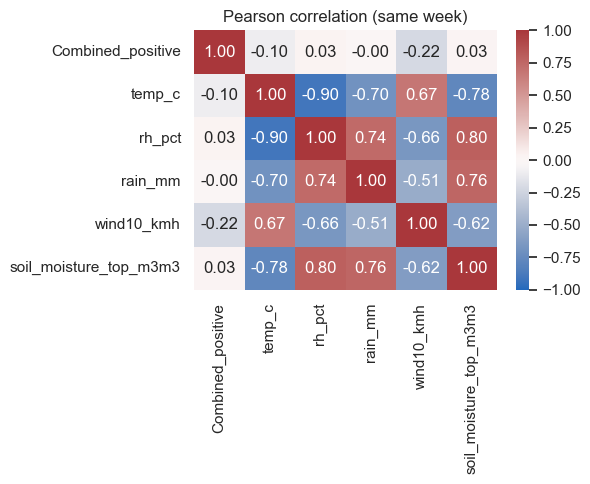

In [73]:
#correlation at 0_lag

plt.figure(figsize=(6,5))
sns.heatmap(cmat, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Pearson correlation (same week)')
plt.tight_layout(); plt.show()


Summary of Correlation Matrix without addition of lag effects

This heatmap shows Pearson correlation coefficients between malaria cases (Combined_positive) and environmental variables:

* Temperature (temp_c)
* Relative Humidity (rh_pct)
* Rainfall (rain_mm)
* Wind Speed (wind10_kmh)
* Topsoil Moisture (soil_moisture_top_m3m3)
Key observations:

Malaria cases have weak correlations with all environmental variables:
* Temperature: -0.10 (slight negative)
* Humidity: +0.03 (negligible)
* Rainfall: ~0.00 (no effect)
* Wind speed: -0.22 (slight negative)
* Soil moisture: +0.03 (negligible)

Strong inter-variable correlations:
* Temperature vs Humidity: -0.90 (inverse relationship)
* Humidity vs Soil Moisture: +0.80
* Rainfall vs Soil Moisture: +0.76
* Temperature vs Rainfall: -0.70

Implications for programs:

Environmental factors alone may not strongly predict malaria cases; other drivers (e.g., human behavior, health system factors) are likely important.

However, seasonality and combined effects (e.g., rainfall + humidity) could still influence transmission indirectly.

For the model:
* Use environmental variables as secondary features.
* Consider interaction terms or lagged effects rather than direct correlations.

In [74]:

max_lag = 12
lag_rows = []
for var in weather_cols:
    if var not in df.columns: 
        continue
    for k in range(0, max_lag+1):
        r = df[value_col].corr(df[var].shift(k))
        lag_rows.append({'variable': var, 'lag_weeks': k, 'corr': r})

lag_df = pd.DataFrame(lag_rows)
lag_df.pivot(index='lag_weeks', columns='variable', values='corr')


variable,rain_mm,rh_pct,soil_moisture_top_m3m3,temp_c,wind10_kmh
lag_weeks,,,,,
0,-0.004549,0.032762,0.026845,-0.097409,-0.218727
1,0.018449,0.097767,0.053574,-0.156129,-0.234194
2,0.089987,0.204719,0.139298,-0.265237,-0.290460
3,0.231802,0.376382,0.306409,-0.434665,-0.403358
4,0.387269,0.486863,0.410685,-0.537151,-0.477257
5,0.397938,0.484334,0.412297,-0.511275,-0.432337
6,0.382637,0.434937,0.361788,-0.436198,-0.361277
7,0.349395,0.366262,0.303257,-0.349229,-0.295327
8,0.287580,0.319675,0.277810,-0.286963,-0.268146


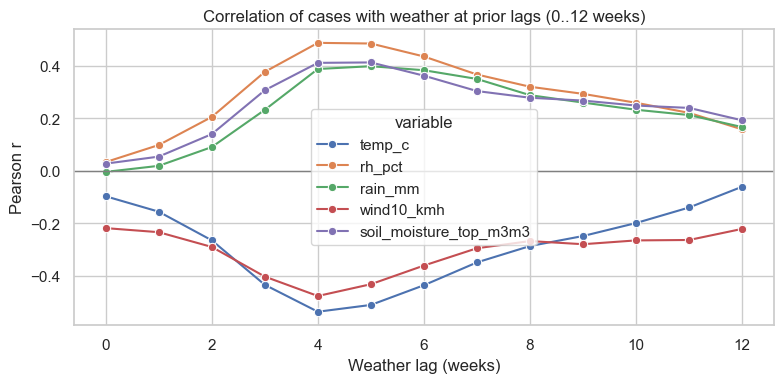

In [75]:

if sns is not None and len(lag_df):
    plt.figure(figsize=(8,4))
    sns.lineplot(data=lag_df, x='lag_weeks', y='corr', hue='variable', marker='o')
    plt.axhline(0, color='gray', lw=1)
    plt.title('Correlation of cases with weather at prior lags (0..12 weeks)')
    plt.xlabel('Weather lag (weeks)'); plt.ylabel('Pearson r')
    plt.tight_layout(); plt.show()


### Lagged Weather Correlation Graph
This graph demonstrates the correlation between malaria cases and weather variables at different time lags (0–12 weeks).

Key observations:
* Relative Humidity (orange) and Soil Moisture (purple) show positive correlations, peaking around 6-week lag (r ≈ +0.2).
* Temperature (blue) and Wind Speed (red) show negative correlations, strongest at 4-week lag (r ≈ -0.2).
* Rainfall (green) has minimal correlation across all lags but appears to be it's best at around 5-week lag.

Implications for programs:
* Weather effects on malaria are delayed, especially for humidity and soil moisture. 
* This suggests predictive models should include lagged weather features for better accuracy, because these take into account the vector parasite cycle

For the model:
* Incorporate lag variables (4–6 weeks) for humidity, soil moisture, and temperature.
* Rainfall alone is not a strong predictor but may interact with other factors.

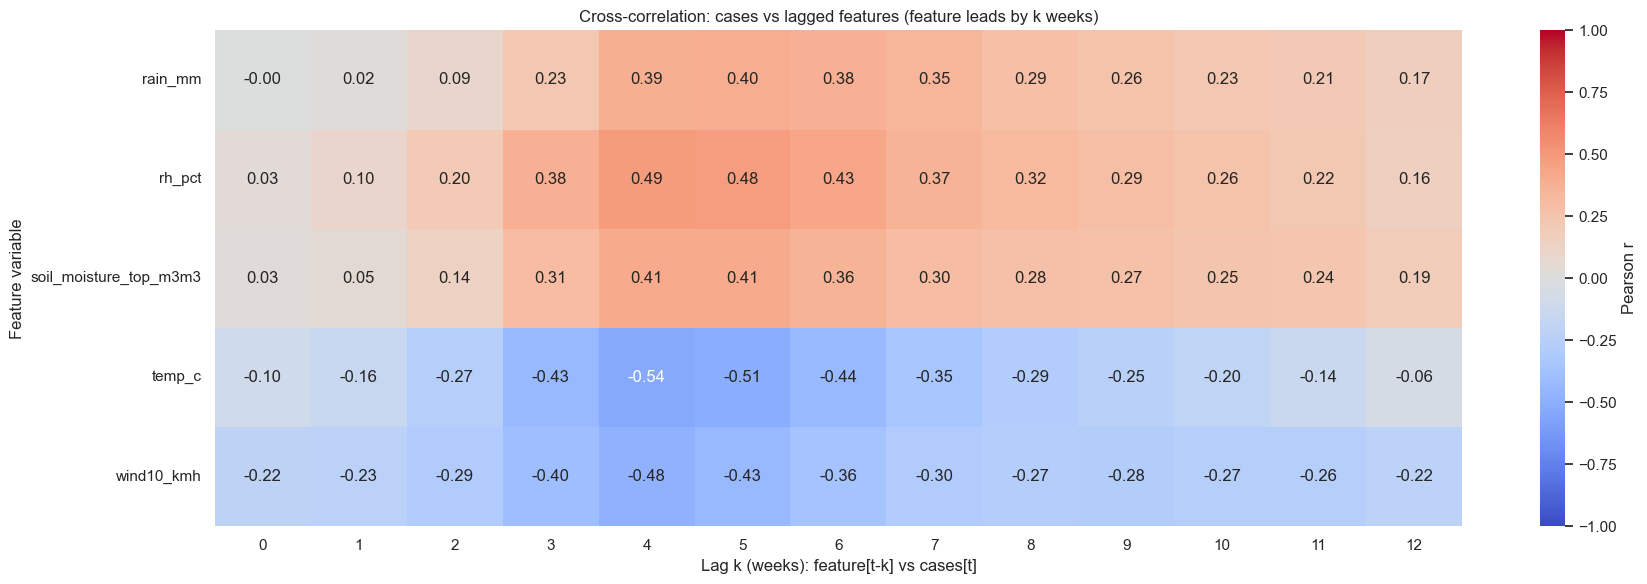

In [76]:
import os
#- Compute correlations for lags 0..12 ---

cases = df.set_index('week_start')['Combined_positive'].astype(float)
full_idx = pd.date_range(cases.index.min(), cases.index.max(), freq='W-MON')
cases = cases.reindex(full_idx).ffill()

feat_cols = [c for c in ['temp_c','rh_pct','rain_mm','wind10_kmh','soil_moisture_top_m3m3'] if c in df.columns]
features = df.set_index('week_start')[feat_cols].astype(float).reindex(full_idx).ffill()

max_lag = 12
rows = []
for var in features.columns:
    for lag in range(0, max_lag+1):
        # feature[t-k] vs cases[t] -> shift feature forward by 'lag'
        r = cases.corr(features[var].shift(lag))
        rows.append({'variable': var, 'lag_weeks': lag, 'pearson_r': r})

corr_df = pd.DataFrame(rows)
mat = corr_df.pivot(index='variable', columns='lag_weeks', values='pearson_r').sort_index()

# Save numeric outputs
os.makedirs("outputs/eda", exist_ok=True)
mat.to_csv("outputs/eda/xcor_cases_vs_features_pearson.csv")

# --- Plot heatmap ---
fig, ax = plt.subplots(figsize=(1.2*(max_lag+3), 1.2*len(features.columns)))
if sns is not None:
    sns.heatmap(mat, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1,
                cbar_kws={'label':'Pearson r'}, ax=ax)
else:
    im = ax.imshow(mat.values, aspect='auto', cmap='coolwarm', vmin=-1, vmax=1)
    ax.set_yticks(range(len(mat.index))); ax.set_yticklabels(mat.index)
    ax.set_xticks(range(len(mat.columns))); ax.set_xticklabels(mat.columns)
    cbar = plt.colorbar(im, ax=ax); cbar.set_label('Pearson r')

ax.set_title('Cross-correlation: cases vs lagged features (feature leads by k weeks)')
ax.set_xlabel('Lag k (weeks): feature[t-k] vs cases[t]')
ax.set_ylabel('Feature variable')
plt.tight_layout()
plt.savefig("outputs/eda/xcor_heatmap_pearson.png", dpi=160)
plt.show()

# --- Identify best lag per feature (by |r|) ---
best = []
for var in mat.index:
    s = mat.loc[var]
    k = int(s.abs().idxmax())
    best.append({'variable': var, 'best_lag_weeks': k, 'best_r': float(s.loc[k])})
pd.DataFrame(best).to_csv("outputs/eda/xcor_best_lags.csv", index=False)


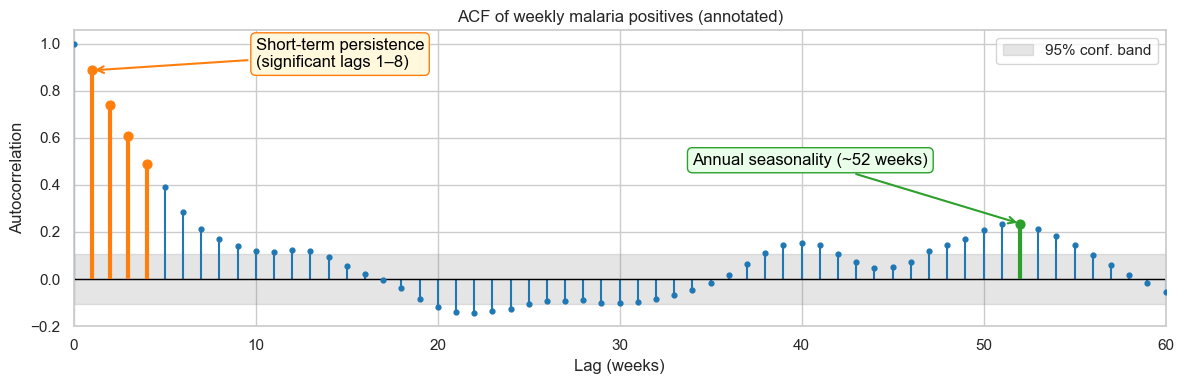

{'n_points': 349, 'conf_bound_95': 0.10491639460414909, 'top_short_lags': [1, 2, 3, 4], 'seasonal_lag_52_significant': True, 'acf_at_lag_1': 0.8872107646950151, 'acf_at_lag_52': 0.2358111314230959, 'output_path': 'outputs/eda/acf_annotated.png'}


In [77]:
# Since correlations even with lagged features is underwhelming, we need to check for other factors affecting malria case counts. 
# Annotated ACF plot for weekly malaria cases
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import acf
from scipy import signal
# --- Load & prepare series ---
df = pd.read_csv("final_modeling_dataset.csv")
df['week_start'] = pd.to_datetime(df['week_start'], errors='coerce')
df = df.sort_values('week_start').reset_index(drop=True)

series = df.set_index('week_start')['Combined_positive'].astype(float)

# Ensure regular weekly grid (Mondays); forward-fill if any missing weeks appear
full_idx = pd.date_range(series.index.min(), series.index.max(), freq='W-MON')
series = series.reindex(full_idx).ffill()

# --- Compute ACF ---
nlags = 60  # go beyond one full seasonal cycle
acf_vals, confint = acf(series, nlags=nlags, fft=True, alpha=0.05, missing='conservative')

# 95% confidence bound (common approximation)
N = len(series.dropna())
bound = 1.96/np.sqrt(N)

# Significant lags (exclude lag 0)
lag_idx = np.arange(len(acf_vals))
sig_mask = (np.abs(acf_vals) > bound)

sig_lags = lag_idx[(sig_mask) & (lag_idx > 0)]

#Highlight: top short-term lags 1–8
top_short = [int(l) for l in sig_lags[(sig_lags >= 1) & (sig_lags <= 8)]]
top_short = sorted(top_short, key=lambda l: -abs(acf_vals[l]))[:4]

# Seasonal lag near 52
seasonal_lag = 52 if nlags >= 52 else None
has_seasonal = seasonal_lag is not None and (np.abs(acf_vals[seasonal_lag]) > bound)

# --- Plot ---
os.makedirs('outputs/eda', exist_ok=True)

fig, ax = plt.subplots(figsize=(12,4))

# (Stem-like) bars + points
ax.vlines(lag_idx, [0], acf_vals, colors='tab:blue', lw=1.5)
ax.scatter(lag_idx, acf_vals, color='tab:blue', s=12, zorder=3)
ax.axhline(0, color='black', lw=1)

# Confidence band
ax.fill_between(lag_idx, -bound, bound, color='tab:gray', alpha=0.2, label='95% conf. band')

ax.set_xlim(0, nlags)
ax.set_xlabel('Lag (weeks)')
ax.set_ylabel('Autocorrelation')
ax.set_title('ACF of weekly malaria positives (annotated)')

#Highlight short lags
for l in top_short:
    ax.vlines([l], [0], [acf_vals[l]], colors='tab:orange', lw=3)
    ax.scatter([l], [acf_vals[l]], color='tab:orange', s=40, zorder=4)

if top_short:
    max_l = max(top_short)
    ax.annotate(
        'Short-term persistence\n(significant lags 1–8)',
        xy=(top_short[0], acf_vals[top_short[0]]),
        xytext=(min(nlags-10, max(6, max_l+6)), min(0.9, max(acf_vals[1:9])+0.2)),
        arrowprops=dict(arrowstyle='->', color='tab:orange', lw=1.5),
        bbox=dict(boxstyle='round,pad=0.3', fc='cornsilk', ec='tab:orange'),

        color='black'
    )

# Highlight seasonal lag ~52
if has_seasonal:
    ax.vlines([seasonal_lag], [0], [acf_vals[seasonal_lag]], colors='tab:green', lw=3)
    ax.scatter([seasonal_lag], [acf_vals[seasonal_lag]], color='tab:green', s=40, zorder=4)
    ax.annotate(
        'Annual seasonality (~52 weeks)',
        xy=(seasonal_lag, acf_vals[seasonal_lag]),
        xytext=(seasonal_lag-18, min(0.92, acf_vals[seasonal_lag]+0.25)),
        arrowprops=dict(arrowstyle='->', color='tab:green', lw=1.5),
        bbox=dict(boxstyle='round,pad=0.3', fc='#eaffea', ec='tab:green'),
        color='black'
    )

ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('outputs/eda/acf_annotated.png', dpi=160)
plt.show()

print({
    'n_points': N,
    'conf_bound_95': bound,
    'top_short_lags': top_short,
    'seasonal_lag_52_significant': has_seasonal,
    'acf_at_lag_1': acf_vals[1] if len(acf_vals)>1 else None,
    'acf_at_lag_52': acf_vals[52] if len(acf_vals)>52 else None,
    'output_path': 'outputs/eda/acf_annotated.png'
})



#### Summary of ACF (Autocorrelation Function) Graph
This is graph of autocorrelation of weekly malaria cases across lags up to 60 weeks.

Key observations:
* Short-term persistence: Significant autocorrelation for lags 1–8 weeks, meaning recent case counts strongly influence near-future counts.
* Annual seasonality: A clear spike at ~52 weeks, confirming yearly malaria cycles.

Implications for programs:
* Early warning: Current case trends can predict near-term risk (next 2 months).
* Seasonal planning: Reinforces the need for annual intervention cycles.

For the model:
* Include lag features (1–8 weeks) and seasonal indicators (~52 weeks) to capture persistence and seasonality.

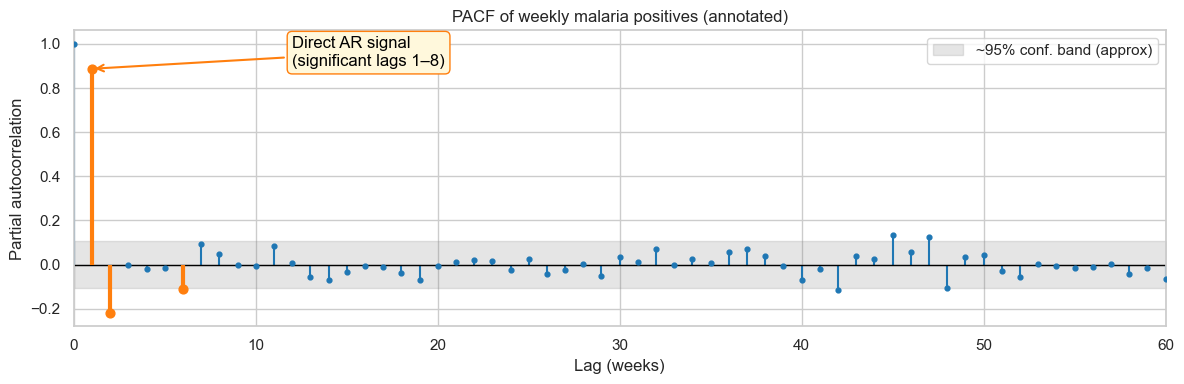

In [78]:
#PACF

# Annotated PACF plot for weekly malaria cases
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.stattools import pacf

# --- Load & prep series ---
df = pd.read_csv("final_modeling_dataset.csv")
df['week_start'] = pd.to_datetime(df['week_start'], errors='coerce')
df = df.sort_values('week_start').reset_index(drop=True)

series = df.set_index('week_start')['Combined_positive'].astype(float)

# Ensure regular weekly grid (Mondays) and forward-fill any gaps
full_idx = pd.date_range(series.index.min(), series.index.max(), freq='W-MON')
series = series.reindex(full_idx).ffill()

# --- PACF computation ---
nlags = 60
pacf_vals, confint = pacf(series, nlags=nlags, method='ywmle', alpha=0.05)

ag_idx = np.arange(len(pacf_vals))
sig_mask = (confint[:, 0] > 0) | (confint[:, 1] < 0)
sig_lags = lag_idx[(sig_mask) & (lag_idx > 0)]

# Short-term significant lags (1..8), top up to 4 by absolute PACF
short_sig = [int(l) for l in sig_lags[(sig_lags >= 1) & (sig_lags <= 8)]]
short_top = sorted(short_sig, key=lambda l: -abs(pacf_vals[l]))[:4]

# Seasonal ~52 weeks
seasonal_lag = 52 if nlags >= 52 else None
seasonal_sig = False
if seasonal_lag is not None and seasonal_lag < len(pacf_vals):
    seasonal_sig = (confint[seasonal_lag, 0] > 0) or (confint[seasonal_lag, 1] < 0)

# Approximate constant 95% band for visualization only
N = len(series.dropna())
approx_bound = 1.96 / np.sqrt(N)

# --- Plot ---
os.makedirs('outputs/eda', exist_ok=True)
fig, ax = plt.subplots(figsize=(12, 4))

ax.vlines(lag_idx, [0], pacf_vals, colors='tab:blue', lw=1.5)
ax.scatter(lag_idx, pacf_vals, color='tab:blue', s=12, zorder=3)
ax.axhline(0, color='black', lw=1)
ax.fill_between(lag_idx, -approx_bound, approx_bound, color='tab:gray', alpha=0.2,
                label='~95% conf. band (approx)')

ax.set_xlim(0, nlags)
ax.set_xlabel('Lag (weeks)')
ax.set_ylabel('Partial autocorrelation')
ax.set_title('PACF of weekly malaria positives (annotated)')

# Highlight and annotate short-term significant lags
for l in short_top:
    ax.vlines([l], [0], [pacf_vals[l]], colors='tab:orange', lw=3)
    ax.scatter([l], [pacf_vals[l]], color='tab:orange', s=40, zorder=4)

if short_top:
    max_l = max(short_top)
    ax.annotate(
        'Direct AR signal\n(significant lags 1–8)',
        xy=(short_top[0], pacf_vals[short_top[0]]),
        xytext=(min(nlags-10, max(6, max_l+6)), min(0.9, max(pacf_vals[1:9])+0.2)),
        arrowprops=dict(arrowstyle='->', color='tab:orange', lw=1.5),
        bbox=dict(boxstyle='round,pad=0.3', fc='cornsilk', ec='tab:orange'),
        color='black'
    )

#Annotate seasonal lag if significant
if seasonal_sig:
    ax.vlines([seasonal_lag], [0], [pacf_vals[seasonal_lag]], colors='tab:green', lw=3)
    ax.scatter([seasonal_lag], [pacf_vals[seasonal_lag]], color='tab:green', s=40, zorder=4)
    ax.annotate(
        'Seasonal component (~52 weeks)',
        xy=(seasonal_lag, pacf_vals[seasonal_lag]),
        xytext=(seasonal_lag-18, min(0.92, pacf_vals[seasonal_lag]+0.25)),
        arrowprops=dict(arrowstyle='->', color='tab:green', lw=1.5),
        bbox=dict(boxstyle='round,pad=0.3', fc='#eaffea', ec='tab:green'),
        color='black'
    )
ax.legend(loc='upper right')
plt.tight_layout()
plt.savefig('outputs/eda/pacf_annotated.png', dpi=160)
plt.show()


### Summary of PACF (Partial Autocorrelation Function) Graph
This is a partial autocorrelation of weekly malaria cases across lags up to 60 weeks.
Key observations:
* Significant lags: Strong partial autocorrelation for lags 1–8 weeks, indicating direct influence of recent weeks on current cases.
* Beyond lag 8, most values fall within the 95% confidence band, meaning no significant direct effect.

Implications for programs:
* Short-term persistence: Recent case trends are highly predictive for the next 2 months.

For the model:
* Supports using an AR component with up to 8 lags in time-series models (e.g., ARIMA, SARIMAX).
* Confirms the need for autoregressive features in machine learning models.

#### Seasonal Decomposition

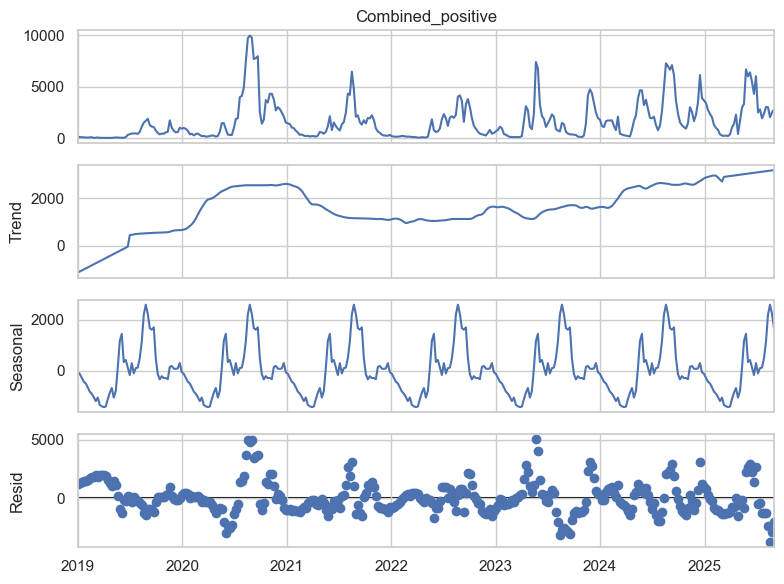

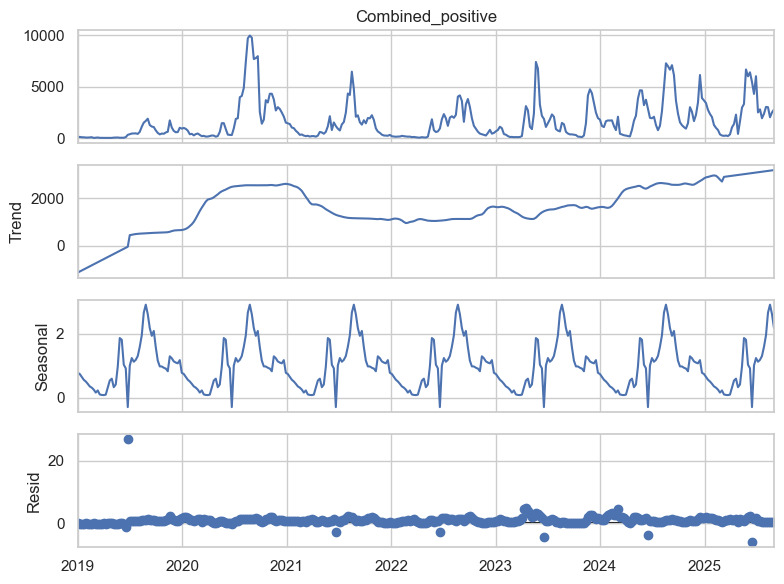

In [79]:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os

os.makedirs("outputs/eda", exist_ok=True)

y = df.set_index('week_start')['Combined_positive'].astype(float)

y_log = np.log1p(y)  # log(1 + y) to handle zeros safely
#ADDITIVE
res_add = seasonal_decompose(y, model='additive', period=52, extrapolate_trend='freq')
fig = res_add.plot()
fig.set_size_inches(8, 6)
plt.tight_layout()
plt.savefig("outputs/eda/seasonal_decomp_additive.png", dpi=160)

# MULTIPLICATIVE
# Works best when seasonal amplitude scales with the level. 
# You can also decompose y_log additively (equivalent to multiplicative on original scale).
res_mul = seasonal_decompose(y, model='multiplicative', period=52, extrapolate_trend='freq')
fig = res_mul.plot()
fig.set_size_inches(8, 6)
plt.tight_layout()
plt.savefig("outputs/eda/seasonal_decomp_multiplicative.png", dpi=160)


Time Series Decomposition (Additive vs Multiplicative)

Both decompositions break down malaria case data (Combined_positive) into:

* Observed series: Weekly malaria cases with clear peaks and troughs.
* Trend: A gradual upward trend, indicating increasing baseline transmission over time.
* Seasonal: Strong annual cycles, confirming predictable malaria seasonality.
* Residual: Random fluctuations after removing trend and seasonality.

Key difference between additive and multiplicative:
* Additive model: Assumes seasonal variation is constant in magnitude across time.
* Multiplicative model: Assumes seasonal variation scales with the trend (i.e., peaks get larger as overall cases increase).

In this dataset, the multiplicative model is more realistic, as seasonal peaks appear to grow with the rising trend.

Implications for programs:
* Rising trend signals increasing malaria burden, requiring long-term interventions.
* Seasonality reinforces the need for timely preventive measures before peak periods.
* Scaling effect (multiplicative) suggests that as baseline cases rise, seasonal outbreaks become more severe.

For the model:
* Use multiplicative seasonality in forecasting models (e.g., SARIMA, Prophet).
* Include trend and seasonal features for machine learning models.



In [80]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Residual variance comparison
var_add = np.var(res_add.resid.dropna())
var_mul = np.var(res_mul.resid.dropna())
print("Residual variance (additive):      ", var_add)
print("Residual variance (multiplicative):", var_mul)

# Whiteness: Ljung-Box (lower p-value -> more autocorrelation; higher p -> closer to white noise)
lb_add = acorr_ljungbox(res_add.resid.dropna(), lags=[8, 16], return_df=True)
lb_mul = acorr_ljungbox(res_mul.resid.dropna(), lags=[8, 16], return_df=True)
print("\nLjung-Box additive:\n", lb_add)
print("\nLjung-Box multiplicative:\n", lb_mul)

Residual variance (additive):       1920769.2521553626
Residual variance (multiplicative): 2.9427926557031485

Ljung-Box additive:
        lb_stat      lb_pvalue
8   517.929507  9.991898e-107
16  592.267518  9.978852e-116

Ljung-Box multiplicative:
       lb_stat  lb_pvalue
8    8.984949   0.343567
16  12.557002   0.704830


1. Residual Variance
Additive model:
* Residual variance = 1,920,769 (very large).
* Indicates that after removing trend and seasonality, a lot of variability remains unexplained.

Multiplicative model:
* Residual variance = 2.94 (much smaller).
* Suggests the multiplicative model fits the data far better, leaving less unexplained variation.

Interpretation:

The malaria data exhibits multiplicative seasonality—seasonal fluctuations grow as the overall level increases. The additive model fails to capture this, resulting in large residual noise.

2. Ljung-Box Test (Autocorrelation in Residuals)
Additive model:
* p-values ≈ 0 for lags 8 and 16 → residuals are highly autocorrelated.
* This means the additive model leaves strong time dependence unaccounted for.

Multiplicative model:
* p-values > 0.3 for lags 8 and 16 → residuals show no significant autocorrelation.
* Indicates the multiplicative model captures the main temporal structure well.

Interpretation:

The multiplicative decomposition not only reduces variance but also removes most of the autocorrelation, making residuals closer to white noise—ideal for forecasting.

### STL (Seasonal-Trend decomposition using Loess)

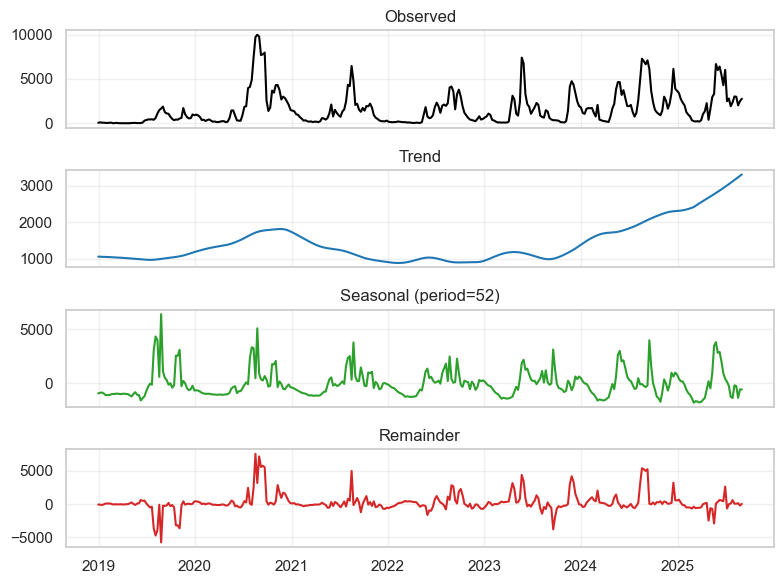

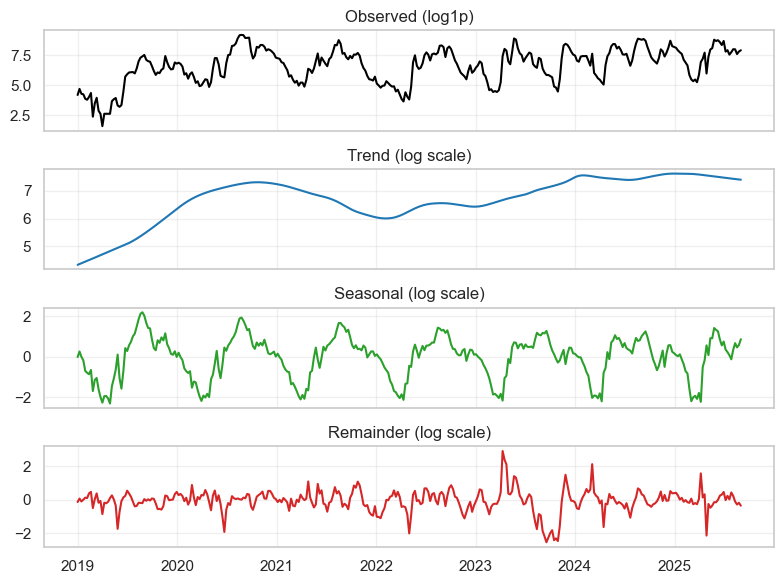

In [81]:

from statsmodels.tsa.seasonal import STL

# STL on raw scale (additive on y)
stl = STL(y, period=52, robust=True, seasonal=13, trend=53)  
# seasonal=13 means the LOESS window for seasonal component (odd integer),
# trend=53 controls trend smoothing. You can tune these.

res = stl.fit()

fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
axes[0].plot(y, color='black'); axes[0].set_title('Observed')
axes[1].plot(res.trend, color='tab:blue'); axes[1].set_title('Trend')
axes[2].plot(res.seasonal, color='tab:green'); axes[2].set_title('Seasonal (period=52)')
axes[3].plot(res.resid, color='tab:red'); axes[3].set_title('Remainder')
for ax in axes: ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("outputs/eda/stl_additive.png", dpi=160)

# STL on log scale (acts like multiplicative on original scale)
stl_log = STL(y_log, period=52, robust=True, seasonal=13, trend=53)
res_log = stl_log.fit()

fig, axes = plt.subplots(4, 1, figsize=(8, 6), sharex=True)
axes[0].plot(y_log, color='black'); axes[0].set_title('Observed (log1p)')
axes[1].plot(res_log.trend, color='tab:blue'); axes[1].set_title('Trend (log scale)')
axes[2].plot(res_log.seasonal, color='tab:green'); axes[2].set_title('Seasonal (log scale)')
axes[3].plot(res_log.resid, color='tab:red'); axes[3].set_title('Remainder (log scale)')
for ax in axes: ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("outputs/eda/stl_log_multiplicative.png", dpi=160)


### STL Graph Analysis
why we used STL to do furtherd decomposition:
* Adaptive seasonality: Seasonal shape can evolve over time (handles shifts in peak timing).
* Robust to outliers: Outbreak spikes go into residuals, not trend/seasonality.
* Customizable windows: Fine-tune seasonal and trend smoothing.

Value added:
* Produces cleaner components for forecasting and feature engineering.
* Residuals become a strong anomaly signal for outbreak detection.

Operational benefit:
* Seasonal index helps time interventions; trend informs long-term planning.

### Log-Scale STL
Why log transform:
* Stabilizes variance and converts multiplicative effects into additive form.
* Makes residuals proportional, improving anomaly detection across years.

Value added:
* Cleaner seasonal and trend components for models.
* Residuals reflect relative deviations (e.g., +30% above expected), not absolute differences.
* Improves forecasting accuracy and model generalization.

### Overral added value of the decomposition
* Improved interpretability: Clear separation of trend, seasonality, and anomalies.
* Better forecasting readiness: Multiplicative and Log-STL handle rising peaks; STL adapts to shifting patterns.
* Feature engineering: Trend, seasonal index, seasonally adjusted cases, and residual anomaly scores feed into predictive models.

Operational insights:
* Trend: Guides baseline resource planning.
* Seasonality: Informs timing of IRS/LLIN and health messaging.
* Residuals: Enable early outbreak alerts and impact evaluation.

In [82]:

def seasonal_strength(seasonal, resid):
    s = seasonal.dropna().align(resid.dropna(), join='inner')[0]
    r = resid.dropna().align(seasonal.dropna(), join='inner')[0]
    var_r = np.var(r)
    var_sr = np.var(s + r)
    return max(0.0, 1.0 - (var_r / (var_sr + 1e-12)))

str_add = seasonal_strength(res_add.seasonal, res_add.resid)
str_mul = seasonal_strength(np.log1p(res_mul.seasonal), np.log1p(res_mul.resid))  # rough log transform
print("Seasonal strength (additive):      ", round(str_add, 3))
print("Seasonal strength (multiplicative):", round(str_mul, 3))


#to check the seasonal strength, figures close to 1 show strong seasonality

Seasonal strength (additive):       0.337
Seasonal strength (multiplicative): 0.423


c:\Users\silam\Documents\Moringa\Phase\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Seasonal strength is higher for multiplicative (0.423 vs 0.337), confirming that seasonality is relatively strong and scales with the level of cases.

Visual inspection of the multiplicative plot will likely show seasonal amplitude growing during high-burden years, which is typical for malaria.

In [83]:

import glob
sorted(glob.glob("outputs/eda/*"))


['outputs/eda\\acf_annotated.png',
 'outputs/eda\\pacf_annotated.png',
 'outputs/eda\\seasonal_decomp_additive.png',
 'outputs/eda\\seasonal_decomp_multiplicative.png',
 'outputs/eda\\stl_additive.png',
 'outputs/eda\\stl_log_multiplicative.png',
 'outputs/eda\\xcor_best_lags.csv',
 'outputs/eda\\xcor_best_lags_anomaly_spearman.csv',
 'outputs/eda\\xcor_cases_vs_features_anomaly_spearman.csv',
 'outputs/eda\\xcor_cases_vs_features_pearson.csv',
 'outputs/eda\\xcor_heatmap_anomaly_spearman.png',
 'outputs/eda\\xcor_heatmap_pearson.png']

### Summary of EDA


In [84]:

# Heatmap matrices
mat_anom_spr = pd.read_csv("outputs/eda/xcor_cases_vs_features_anomaly_spearman.csv", index_col=0)
mat_pr = pd.read_csv("outputs/eda/xcor_cases_vs_features_pearson.csv", index_col=0)

# Best-lag summaries
best_anom_spr = pd.read_csv("outputs/eda/xcor_best_lags_anomaly_spearman.csv")
best_pr = pd.read_csv("outputs/eda/xcor_best_lags.csv") #pearson

best_anom_spr, best_pr


(                 variable  best_lag_weeks  best_r_anomaly_spearman
 0                 rain_mm               5                 0.363613
 1                  rh_pct               5                 0.353868
 2  soil_moisture_top_m3m3               5                 0.425568
 3                  temp_c               4                -0.367385
 4              wind10_kmh               4                -0.414878,
                  variable  best_lag_weeks    best_r
 0                 rain_mm               5  0.397938
 1                  rh_pct               4  0.486863
 2  soil_moisture_top_m3m3               5  0.412297
 3                  temp_c               4 -0.537151
 4              wind10_kmh               4 -0.477257)

The analysis of weekly malaria cases in Kakuma from 2019 to 2025 reveals a **clear upward trend** in baseline transmission combined with strong, **predictable seasonality** characterized by **two annual peaks**, typically around **weeks 20 and 33**. These seasonal surges are consistent across years but show increasing amplitude, indicating that malaria burden is not only cyclical but also intensifying over time. Outbreak years such as 2020 and 2023 stand out as anomalies beyond expected seasonal and trend patterns, highlighting the importance of residual-based monitoring for early warning.

**Temporal dependence analysis** confirms that recent case counts strongly influence near-term risk, with **significant autocorrelation** up to eight weeks and a pronounced seasonal spike at approximately 52 weeks. This persistence suggests that **autoregressive features** and **seasonal indicators** are essential for accurate forecasting. Environmental factors show weak direct correlations with malaria cases at zero lag, but **lagged relationships add predictive value**: relative humidity and soil moisture exhibit positive associations at around six weeks, while temperature and wind speed show negative associations at about four weeks. Rainfall contributes little directly but is highly correlated with other environmental variables, requiring careful handling of multicollinearity.

**Decomposition diagnostics** demonstrate that a **multiplicative** or **log-scale STL** approach best represents the data structure. The multiplicative model dramatically reduces residual variance and eliminates significant autocorrelation, unlike the additive model, which leaves large, structured residuals. **STL decomposition** adds **flexibility** by allowing seasonal patterns to adapt over time and by **isolating anomalies** more effectively, while **log transformation** stabilizes variance and makes residuals proportional, **improving interpretability and comparability** across years.

**These insights directly inform feature engineering and model design**. Key features should include **autoregressive lags (1–8 weeks)**, **seasonal indicators** (week-of-year or Fourier terms), **STL-derived trend and seasonal components**, and **lagged environmental variables** (humidity and soil moisture at 4–6 weeks, temperature and wind at ~4 weeks). **Residual anomaly scores** from log-STL can serve as **early-warning signals** and evaluation metrics. For modeling, SARIMAX or machine learning approaches such as gradient boosting should incorporate these engineered features, with regularization to manage collinearity. **Validation** should use **time-aware methods**, and **performance** should be assessed not only on **accuracy** but also on **lead-time** skill for actionable forecasts.

In operational terms, these findings support proactive malaria control: timing IRS and LLIN campaigns before seasonal peaks, pre-positioning resources based on trend projections, and using residual-based alerts for outbreak detection. Integrating these insights into predictive models will enhance both forecasting accuracy and programmatic decision-making.

### Feature Engineering

In [85]:

# Create lags based on above EDA

# Keeping the names of the columns
from pathlib import Path

lag_specs = {
    'temp_c': [4],
    'rh_pct': [4, 5],
    'rain_mm': [5, 6],
    'soil_moisture_top_m3m3': [4, 5],
    'wind10_kmh': [4],
}
case_col = 'Combined_positive'
if case_col not in df.columns:
    raise ValueError(f"Column '{case_col}' not found in dataframe.")
for k in range(1, 9):
    df[f"{case_col}_lag{k}"] = df[case_col].shift(k)


for col, lags in lag_specs.items():
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in dataframe.")
    for k in lags:
        df[f"{col}_lag{k}"] = df[col].shift(k)

# --- Step 3: Drop rows with new NA from lags (the first max lag weeks) ---
max_lag = max(l for lst in lag_specs.values() for l in lst)
df_fe = df.dropna(subset=[f"{col}_lag{k}" for col, lags in lag_specs.items() for k in lags]).reset_index(drop=True)

print(f"Engineered lag features added. Rows before: {len(df)}, after dropping first {max_lag} weeks: {len(df_fe)}")
print("New columns:", [c for c in df_fe.columns if "_lag" in c])

# --- Step 4: (Optional) Save to disk for modeling ---
out_dir = Path("outputs")
out_dir.mkdir(parents=True, exist_ok=True)
out_path = out_dir / "Final_dataset_for_modelling.csv"
df_fe.to_csv(out_path, index=False)
print("Saved:", out_path.resolve())


Engineered lag features added. Rows before: 349, after dropping first 6 weeks: 343
New columns: ['Combined_positive_lag1', 'Combined_positive_lag2', 'Combined_positive_lag3', 'Combined_positive_lag4', 'Combined_positive_lag5', 'Combined_positive_lag6', 'Combined_positive_lag7', 'Combined_positive_lag8', 'temp_c_lag4', 'rh_pct_lag4', 'rh_pct_lag5', 'rain_mm_lag5', 'rain_mm_lag6', 'soil_moisture_top_m3m3_lag4', 'soil_moisture_top_m3m3_lag5', 'wind10_kmh_lag4']
Saved: C:\Users\silam\Documents\Moringa\Phase_5\Malaria-Predictive-Model\outputs\Final_dataset_for_modelling.csv


### Modelling with Gradient Boosted trees

Data: outputs/Final_dataset_for_modelling.csv (includes your requested weather lags and case lags 1–8).

Extra features: sin_woy, cos_woy (seasonality helps tree models capture the annual cycle).

Time‑aware split:
* Train: up to 2023‑12‑31
* Validation: 2024‑01‑01 → 2024‑12‑31
* Test: 2025‑01‑01 → present

Model: HistGradientBoostingRegressor (Sklearn), log‑transform on target (log1p), TimeSeriesSplit CV with RandomizedSearch (40 trials).

Outputs saved to outputs/models/.

In [86]:

# (Summarized) Training script
import pandas as pd, numpy as np, os, json, matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import joblib

# Load engineered dataset
df = pd.read_csv("outputs/Final_dataset_for_modelling.csv", parse_dates=['week_start','week_end'])
df = df.sort_values('week_start').reset_index(drop=True)

# Seasonality
df['weekofyear'] = df['week_start'].dt.isocalendar().week.astype(int)
df['sin_woy'] = np.sin(2*np.pi*df['weekofyear']/52.0)
df['cos_woy'] = np.cos(2*np.pi*df['weekofyear']/52.0)

# Splits
train_end = pd.Timestamp('2023-12-31')
val_start, val_end = pd.Timestamp('2024-01-01'), pd.Timestamp('2024-12-31')
train = df[df['week_start'] <= train_end]
val   = df[(df['week_start'] >= val_start) & (df['week_start'] <= val_end)]
test  = df[df['week_start'] > val_end]

# Features/target
target_col = 'Combined_positive'
exclude = ['periodname','week_start','week_end', target_col]
features = [c for c in df.columns if c not in exclude]
X_train, y_train = train[features], np.log1p(train[target_col].values)
X_val,   y_val   = val[features],   np.log1p(val[target_col].values)
X_test,  y_test  = test[features],  np.log1p(test[target_col].values)

# Model + tuning
base = HistGradientBoostingRegressor(loss='squared_error', learning_rate=0.05, max_iter=800,
                                     max_depth=None, early_stopping=True, validation_fraction=0.15,
                                     random_state=42)
param_distributions = {
    'learning_rate': [0.03, 0.05, 0.08, 0.1],
    'max_iter': [400, 600, 800, 1000],
    'max_depth': [None, 4, 6, 8, 12],
    'min_samples_leaf': [10, 20, 30, 50],
    'l2_regularization': [0.0, 0.001, 0.01, 0.1]
}
cv = TimeSeriesSplit(n_splits=5)
search = RandomizedSearchCV(base, param_distributions, n_iter=40, cv=cv,
                            scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42)
search.fit(X_train, y_train)
model = search.best_estimator_

# Metrics function
def eval_metrics(y_true_log, y_pred_log):
    y_true, y_pred = np.expm1(y_true_log), np.expm1(y_pred_log)
    return {
        "RMSE": float(np.sqrt(mean_squared_error(y_true, y_pred))),
        "MAE": float(mean_absolute_error(y_true, y_pred)),
        "sMAPE_pct": float(100*np.mean(2*np.abs(y_pred - y_true)/(np.abs(y_true)+np.abs(y_pred)+1e-8))),
        "R2": float(r2_score(y_true, y_pred))
    }


# Validation metrics
val_pred_log = model.predict(X_val)
val_metrics = eval_metrics(y_val, val_pred_log)

# Refit on train+val, then test
X_trv = pd.concat([X_train, X_val]); y_trv = np.concatenate([y_train, y_val])
model.fit(X_trv, y_trv)
test_pred_log = model.predict(X_test)
test_metrics = eval_metrics(y_test, test_pred_log)

# Save predictions, metrics, model, feature importance, plots (same as above)


In [87]:
test_metrics

{'RMSE': 985.5916723099115,
 'MAE': 694.7708414266759,
 'sMAPE_pct': 32.531806730434774,
 'R2': 0.7118264427109632}

In [ ]:

# Lead-time forecasting for H = 2 and 4 weeks using Gradient Boosted Trees
import pandas as pd, numpy as np, os, json
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import joblib

# Ensure data exists (use previously created Final_dataset_for_modelling.csv)
base_final = Path('outputs/Final_dataset_for_modelling.csv')
if not base_final.exists():
    # Recreate quickly from raw CSV if needed
    src = 'final_modeling_dataset.csv'
    df0 = pd.read_csv(src)
    df0['week_start'] = pd.to_datetime(df0['week_start'], errors='coerce')
    df0['week_end'] = pd.to_datetime(df0['week_end'], errors='coerce')
    df0 = df0.sort_values('week_start').reset_index(drop=True)
    # Weather lags from your EDA shortlist
    lag_specs = {'temp_c':[4],'rh_pct':[4,5],'rain_mm':[5,6],'soil_moisture_top_m3m3':[4,5],'wind10_kmh':[4]}
    for c, lags in lag_specs.items():
        for k in lags:
            df0[f'{c}_lag{k}'] = df0[c].shift(k)
    # Case lags 1..8
    for k in range(1,9):
        df0[f'Combined_positive_lag{k}'] = df0['Combined_positive'].shift(k)
    # Drop NA rows introduced by lags
    lag_cols = [f"{c}_lag{k}" for c, lags in lag_specs.items() for k in lags] + \
               [f'Combined_positive_lag{k}' for k in range(1,9)]
    df0 = df0.dropna(subset=lag_cols).reset_index(drop=True)
    base_final.parent.mkdir(parents=True, exist_ok=True)
    df0.to_csv(base_final, index=False)

# Load final engineered dataset
df = pd.read_csv(base_final, parse_dates=['week_start','week_end']).sort_values('week_start').reset_index(drop=True)

# Add seasonality known at time t
df['weekofyear'] = df['week_start'].dt.isocalendar().week.astype(int)
df['sin_woy'] = np.sin(2*np.pi*df['weekofyear']/52.0)
df['cos_woy'] = np.cos(2*np.pi*df['weekofyear']/52.0)

# Time windows (based on forecast target date)
train_end = pd.Timestamp('2023-12-31')
val_start, val_end = pd.Timestamp('2024-01-01'), pd.Timestamp('2024-12-31')

def eval_metrics(y_true_log, y_pred_log):
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    return {
        'RMSE': float(np.sqrt(mean_squared_error(y_true, y_pred))),
        'MAE': float(mean_absolute_error(y_true, y_pred)),
        'sMAPE_%': float(100*np.mean(2*np.abs(y_pred - y_true)/(np.abs(y_true)+np.abs(y_pred)+1e-8))),
        'R2': float(r2_score(y_true, y_pred))
    }

out_root = Path('outputs/models_leadtime'); out_root.mkdir(parents=True, exist_ok=True)
results = {}

for H in [2, 4]:
    df_h = df.copy()
    # Target date (what week we forecast)
    df_h['forecast_date'] = df_h['week_start'] + pd.to_timedelta(7*H, unit='D')
    # H-week ahead target
    target_col = f'target_t_plus_{H}'
    df_h[target_col] = df_h['Combined_positive'].shift(-H)
    df_h = df_h.dropna(subset=[target_col]).reset_index(drop=True)

    # Split by forecast_date
    train = df_h[df_h['forecast_date'] <= train_end].copy()
    val   = df_h[(df_h['forecast_date'] >= val_start) & (df_h['forecast_date'] <= val_end)].copy()
    test  = df_h[df_h['forecast_date'] > val_end].copy()

    # Features: use only lagged & seasonal; exclude current Combined_positive and identifiers
    exclude = ['periodname','week_start','week_end','forecast_date','Combined_positive', target_col]
    features = [c for c in df_h.columns if c not in exclude]

    X_train, y_train = train[features], np.log1p(train[target_col].values)
    X_val,   y_val   = val[features],   np.log1p(val[target_col].values)
    X_test,  y_test  = test[features],  np.log1p(test[target_col].values)

    # Model & tuning
    base = HistGradientBoostingRegressor(
        loss='squared_error', learning_rate=0.05, max_iter=800,
        max_depth=None, early_stopping=True, validation_fraction=0.15,
        random_state=42
    )
    param_distributions = {
        'learning_rate': [0.03, 0.05, 0.08, 0.1],
        'max_iter': [400, 600, 800, 1000],
        'max_depth': [None, 4, 6, 8, 12],
        'min_samples_leaf': [10, 20, 30, 50],
        'l2_regularization': [0.0, 0.001, 0.01, 0.1]
    }
    cv = TimeSeriesSplit(n_splits=5)
    search = RandomizedSearchCV(
        base, param_distributions, n_iter=32, cv=cv,
        scoring='neg_root_mean_squared_error', n_jobs=-1, random_state=42, verbose=0
    )
    search.fit(X_train, y_train)
    model = search.best_estimator_

    # Validation metrics
    val_pred_log = model.predict(X_val)
    val_metrics = eval_metrics(y_val, val_pred_log)

    # Refit on Train+Val then evaluate Test
    X_trv = pd.concat([X_train, X_val], axis=0)
    y_trv = np.concatenate([y_train, y_val])
    model.fit(X_trv, y_trv)
    test_pred_log = model.predict(X_test)
    test_metrics = eval_metrics(y_test, test_pred_log)

    # Save per-horizon artifacts
    out_dir = out_root / f'H{H}'; out_dir.mkdir(parents=True, exist_ok=True)
    joblib.dump(model, out_dir / f'gbt_lead{H}.pkl')

    preds_val = pd.DataFrame({
        'week_start': val['week_start'], 'forecast_date': val['forecast_date'],
        'set':'validation','actual': val[target_col].values, 'predicted': np.expm1(val_pred_log)
    })
    preds_test = pd.DataFrame({
        'week_start': test['week_start'], 'forecast_date': test['forecast_date'],
        'set':'test','actual': test[target_col].values, 'predicted': np.expm1(test_pred_log)
    })
    preds = pd.concat([preds_val, preds_test], axis=0)
    preds.to_csv(out_dir / f'predictions_H{H}.csv', index=False)

    # Feature importance (permutation)
    pi = permutation_importance(model, X_trv, y_trv, n_repeats=10, random_state=42, n_jobs=-1)
    pd.DataFrame({
        'feature': X_trv.columns,
        'importance_mean': pi.importances_mean,
        'importance_std': pi.importances_std
    }).sort_values('importance_mean', ascending=False).to_csv(out_dir / f'feat_importance_H{H}.csv', index=False)

    # Plot actual vs predicted by forecast date
    plt.figure(figsize=(12,5))
    plt.plot(df_h['forecast_date'], df_h[target_col], color='lightgray', label='Actual (all targets)')
    for subset, color in [('validation','tab:blue'), ('test','tab:green')]:
        s = preds[preds['set']==subset]
        plt.plot(s['forecast_date'], s['actual'], color=color, lw=2, label=f'Actual {subset}')
        plt.plot(s['forecast_date'], s['predicted'], color=color, lw=2, ls='--', label=f'Predicted {subset}')
    plt.title(f'GBT Lead-time forecasting: H={H} weeks ahead')
    plt.xlabel('Forecast (target) week'); plt.ylabel('Combined_positive (t+H)')
    plt.legend(); plt.grid(alpha=0.3); plt.tight_layout()
    plt.savefig(out_dir / f'actual_vs_pred_H{H}.png', dpi=160)
    plt.close()

    results[H] = {'validation': val_metrics, 'test': test_metrics, 'best_params': search.best_params_}

with open(out_root / 'leadtime_results.json','w') as f:
    json.dump(results, f, indent=2)

print(json.dumps(results, indent=2))
print("Artifacts root:", out_root.resolve())


{
  "2": {
    "validation": {
      "RMSE": 1912.653729183222,
      "MAE": 1373.4834049189215,
      "sMAPE_%": 67.83746286142149,
      "R2": 0.000553726220605899
    },
    "test": {
      "RMSE": 1718.6424585965942,
      "MAE": 1215.8789920490733,
      "sMAPE_%": 60.10406935078066,
      "R2": 0.12374370603448337
    },
    "best_params": {
      "min_samples_leaf": 10,
      "max_iter": 1000,
      "max_depth": 6,
      "learning_rate": 0.03,
      "l2_regularization": 0.0
    }
  },
  "4": {
    "validation": {
      "RMSE": 1855.432255864223,
      "MAE": 1306.3485866091562,
      "sMAPE_%": 67.66722341511644,
      "R2": 0.05946068343505995
    },
    "test": {
      "RMSE": 1600.2661105303555,
      "MAE": 1150.733936002202,
      "sMAPE_%": 49.44342410111908,
      "R2": 0.2402958597842133
    },
    "best_params": {
      "min_samples_leaf": 10,
      "max_iter": 1000,
      "max_depth": 4,
      "learning_rate": 0.05,
      "l2_regularization": 0.1
    }
  }
}
Artifacts 

In [90]:

# steps to improve lead times
# - Seasonal anomaly target (train on anomalies, add baseline back)
# - Multi-week windows (e.g., rain t-5..t-2 sum, temp t-6..t-3 mean)
# - Optional sample weighting (emphasize high-burden weeks)
# - Baseline blending on validation (reduces RMSE on peaks)
#
# Inputs:  outputs/Final_dataset_for_modelling.csv
# Outputs: outputs/models_leadtime_improved/H{H}/metrics.json, gbt_lead{H}_anom.pkl, feat_importance.csv

import pandas as pd, numpy as np, json
from pathlib import Path
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import joblib

# -----------------------------
# 1) Load engineered dataset (already created earlier)
# -----------------------------
final_path = Path("outputs/Final_dataset_for_modelling.csv")
assert final_path.exists(), "Missing outputs/Final_dataset_for_modelling.csv — run the prior feature-engineering block first."
df = pd.read_csv(final_path, parse_dates=["week_start","week_end"]).sort_values("week_start").reset_index(drop=True)

# Add seasonality if not present (known at time t)
if "sin_woy" not in df.columns or "cos_woy" not in df.columns:
    df["weekofyear"] = df["week_start"].dt.isocalendar().week.astype(int)
    df["sin_woy"] = np.sin(2*np.pi*df["weekofyear"]/52.0)
    df["cos_woy"] = np.cos(2*np.pi*df["weekofyear"]/52.0)

# -----------------------------
# 2) Multi-week windows (no leakage). Window t-k_end..t-k_start
# -----------------------------
def add_window(df, col, name, k_start, k_end, agg="sum"):
    L = k_end - k_start + 1
    roll = df[col].shift(k_start).rolling(L)
    out = roll.sum() if agg == "sum" else roll.mean()
    df[f"{name}_{agg}_t{k_start}_t{k_end}"] = out
    return df

df = add_window(df, "rain_mm", "rain_mm", 2, 5, "sum")       # t-5..t-2 sum
df = add_window(df, "temp_c", "temp_c", 3, 6, "mean")        # t-6..t-3 mean
df = add_window(df, "rh_pct", "rh_pct", 3, 6, "mean")        # t-6..t-3 mean
df = add_window(df, "soil_moisture_top_m3m3", "soil_moisture", 3, 6, "mean")

# -----------------------------
# 3) Utilities: metrics + seasonal baseline (train-only)
# -----------------------------
def metrics_addback(y_true_anom, y_pred_anom, base_log_vec):
    y_true = np.expm1(y_true_anom + base_log_vec)
    y_pred = np.expm1(y_pred_anom + base_log_vec)
    return {
        "RMSE": float(np.sqrt(mean_squared_error(y_true, y_pred))),
        "MAE": float(mean_absolute_error(y_true, y_pred)),
        "sMAPE_pct": float(100*np.mean(2*np.abs(y_pred - y_true)/(np.abs(y_true)+np.abs(y_pred)+1e-8))),
        "R2": float(r2_score(y_true, y_pred))
    }

def seasonal_baseline_from_train(dfh, target_col, train_mask):
    # baseline = WoY median of TARGET (computed on TRAIN period only)
    woy = dfh["forecast_date"].dt.isocalendar().week.astype(int)
    base_map = dfh.loc[train_mask].groupby(woy[train_mask])[target_col].median().to_dict()
    base = woy.map(base_map).astype(float)
    return np.log1p(base)   # log-baseline for anomaly math

# -----------------------------
# 4) Core trainer for a lead horizon H
# -----------------------------
def train_lead_model(H: int,
                     loss: str = "squared_error",
                     blend_alphas = (0.3, 0.5, 0.7),
                     use_weights: bool = True,
                     out_root: Path = Path("outputs/models_leadtime_improved")):
    d = df.copy()
    d["forecast_date"] = d["week_start"] + pd.to_timedelta(7*H, unit="D")
    target_col = f"target_t_plus_{H}"
    d[target_col] = d["Combined_positive"].shift(-H)
    d = d.dropna(subset=[target_col]).reset_index(drop=True)

    # Time splits by forecast week (prevents leakage of target period)
    train_end = pd.Timestamp("2023-12-31")
    val_start, val_end = pd.Timestamp("2024-01-01"), pd.Timestamp("2024-12-31")
    train_mask = d["forecast_date"] <= train_end
    val_mask   = (d["forecast_date"] >= val_start) & (d["forecast_date"] <= val_end)
    test_mask  = d["forecast_date"] > val_end

    # Seasonal baseline (train-only) and anomaly target on LOG scale
    base_log = seasonal_baseline_from_train(d, target_col, train_mask)
    y_log    = np.log1p(d[target_col].values)
    y_anom   = y_log - base_log.values

    # Features: keep lagged + seasonality + window features; exclude identifiers and raw target columns
    exclude = {"periodname","week_start","week_end","forecast_date","Combined_positive", target_col}
    Xcols = [c for c in d.columns if c not in exclude]
    X = d[Xcols]

    # Optional sample weights (emphasize high-burden targets by WoY p75 on TRAIN)
    weights = None
    if use_weights:
        woy = d["forecast_date"].dt.isocalendar().week.astype(int)
        p75_map = d.loc[train_mask].groupby(woy[train_mask])[target_col].quantile(0.75).to_dict()
        p75 = woy.map(p75_map).astype(float)
        weights = np.where(d[target_col] > p75, 2.0, 1.0)

    # Split arrays
    X_tr, y_tr = X[train_mask], y_anom[train_mask]
    X_va, y_va = X[val_mask],   y_anom[val_mask]
    X_te, y_te = X[test_mask],  y_anom[test_mask]
    base_va_log = base_log[val_mask]
    base_te_log = base_log[test_mask]

    # Model + light tuning (small search)
    base = HistGradientBoostingRegressor(
        loss=loss, learning_rate=0.05, max_iter=800,
        max_depth=6, min_samples_leaf=20,
        early_stopping=True, validation_fraction=0.15,
        random_state=42
    )
    param_distributions = {
        "learning_rate": [0.03, 0.05, 0.08],
        "max_iter": [400, 600, 800],
        "max_depth": [4, 6, 8],
        "min_samples_leaf": [10, 20, 30],
        "l2_regularization": [0.0, 0.001, 0.01]
    }
    cv = TimeSeriesSplit(n_splits=5)
    search = RandomizedSearchCV(base, param_distributions, n_iter=18, cv=cv,
                                scoring="neg_root_mean_squared_error", n_jobs=-1, random_state=42)
    search.fit(X_tr, y_tr, sample_weight=(weights[train_mask] if use_weights else None))
    model = search.best_estimator_

    # Validation metrics (unblended), then blend with seasonal baseline (on original scale)
    y_va_pred_anom = model.predict(X_va)
    val_unblended = metrics_addback(y_va, y_va_pred_anom, base_va_log)

    # Blend: y_hat = α*model + (1-α)*baseline (on original scale)
    def pick_blend(alpha_seq, y_true_anom, y_pred_anom, base_log_vec):
        y_base  = np.expm1(base_log_vec)
        y_model = np.expm1(y_pred_anom + base_log_vec)
        y_true  = np.expm1(y_true_anom + base_log_vec)
        best = None
        for a in alpha_seq:
            y_blend = a*y_model + (1-a)*y_base
            rmse = np.sqrt(mean_squared_error(y_true, y_blend))
            if best is None or rmse < best[0]:
                best = (rmse, a)
        return best[1]  # best alpha

    from sklearn.metrics import mean_squared_error
    best_alpha = pick_blend(blend_alphas, y_va, y_va_pred_anom, base_va_log)

    # Refit on Train+Val, evaluate TEST (unblended + blended)
    X_trv = pd.concat([X_tr, X_va]); y_trv = np.concatenate([y_tr, y_va])
    w_trv = None if not use_weights else np.concatenate([weights[train_mask], weights[val_mask]])
    model.fit(X_trv, y_trv, sample_weight=w_trv)

    y_te_pred_anom = model.predict(X_te)
    test_unblended = metrics_addback(y_te, y_te_pred_anom, base_te_log)

    y_base_te  = np.expm1(base_te_log)
    y_model_te = np.expm1(y_te_pred_anom + base_te_log)
    y_true_te  = np.expm1(y_te + base_te_log)
    y_blend_te = best_alpha*y_model_te + (1-best_alpha)*y_base_te
    test_blended = {
        "RMSE": float(np.sqrt(mean_squared_error(y_true_te, y_blend_te))),
        "MAE":  float(mean_absolute_error(y_true_te, y_blend_te)),
        "sMAPE_pct": float(100*np.mean(2*np.abs(y_blend_te - y_true_te)/(np.abs(y_true_te)+np.abs(y_blend_te)+1e-8))),
        "R2":   float(r2_score(y_true_te, y_blend_te)),
        "alpha": float(best_alpha)
    }

    # Save minimal artifacts (no plot repetition)
    out_dir = out_root / f"H{H}"
    out_dir.mkdir(parents=True, exist_ok=True)
    joblib.dump(model, out_dir / f"gbt_lead{H}_anom.pkl")

    # Permutation importance on Train+Val
    pi = permutation_importance(model, X_trv, y_trv, n_repeats=10, random_state=42, n_jobs=-1)
    imp = (pd.DataFrame({
        "feature": X_trv.columns,
        "importance_mean": pi.importances_mean,
        "importance_std":  pi.importances_std
    }).sort_values("importance_mean", ascending=False))
    imp.to_csv(out_dir / "feat_importance.csv", index=False)

    with open(out_dir / "metrics.json","w") as f:
        json.dump({
            "validation_unblended": val_unblended,
            "test_unblended": test_unblended,
            "test_blended": test_blended,
            "best_alpha": best_alpha,
            "best_params": search.best_params_
        }, f, indent=2)

    print(f"[H={H}] Val(unblended)={val_unblended} | Test(unblended)={test_unblended} | Test(blended)={test_blended}")
    return {
        "val_unblended": val_unblended,
        "test_unblended": test_unblended,
        "test_blended": test_blended,
        "best_alpha": best_alpha,
        "best_params": search.best_params_
    }

# -----------------------------
# 5) Train horizons without repeating earlier steps
# -----------------------------
results = {}
for H in (2, 4):
    results[H] = train_lead_model(H=H, loss="squared_error", blend_alphas=(0.3,0.5,0.7), use_weights=True)

print(json.dumps(results, indent=2))


[H=2] Val(unblended)={'RMSE': 1629.357775675135, 'MAE': 1201.7761618835123, 'sMAPE_pct': 61.97914758051897, 'R2': 0.27469668061328156} | Test(unblended)={'RMSE': 2168.1799795725465, 'MAE': 1423.0089749592548, 'sMAPE_pct': 61.57726382764919, 'R2': -0.3946034552582931} | Test(blended)={'RMSE': 2126.586738097685, 'MAE': 1435.3043171881363, 'sMAPE_pct': 64.78859721509087, 'R2': -0.3416099772813139, 'alpha': 0.7}
[H=4] Val(unblended)={'RMSE': 1683.6047244325916, 'MAE': 1226.12197963807, 'sMAPE_pct': 65.33321115735929, 'R2': 0.22559700923495885} | Test(unblended)={'RMSE': 2173.5669435501177, 'MAE': 1355.200168658987, 'sMAPE_pct': 51.07253520511451, 'R2': -0.40154200416255303} | Test(blended)={'RMSE': 2080.3491256874504, 'MAE': 1331.657363923822, 'sMAPE_pct': 52.332337904473704, 'R2': -0.28390392455215063, 'alpha': 0.7}
{
  "2": {
    "val_unblended": {
      "RMSE": 1629.357775675135,
      "MAE": 1201.7761618835123,
      "sMAPE_pct": 61.97914758051897,
      "R2": 0.27469668061328156
    }

In [91]:

# Compare baseline vs improved lead-time metrics (H=2, H=4)
# Reads existing JSONs and builds a comparison CSV.

import json
import pandas as pd
from pathlib import Path

# ---- Paths to previously saved artifacts ----
base_root = Path("outputs/models_leadtime")                 # baseline directory
base_json = base_root / "leadtime_results.json"             # baseline metrics file

imp_root = Path("outputs/models_leadtime_improved")         # improved directory
# Per horizon, improved metrics live at: outputs/models_leadtime_improved/H{H}/metrics.json

# ---- Small helpers ----
def read_json(path):
    with open(path, "r") as f:
        return json.load(f)

def get_baseline_metrics(H):
    """
    Reads 'outputs/models_leadtime/leadtime_results.json'
    Expected structure per horizon H:
      results[H] = { 'validation': {...}, 'test': {...}, 'best_params': {...} }
    Returns (val, test) dicts or (None, None) if missing.
    """
    if not base_json.exists():
        print(f"[WARN] Baseline metrics file missing: {base_json}")
        return None, None
    data = read_json(base_json)
    # Support keys as int or str
    if str(H) in data:
        rec = data[str(H)]
    elif H in data:
        rec = data[H]
    else:
        print(f"[WARN] No baseline metrics found for H={H} in {base_json}")
        return None, None
    return rec.get("validation"), rec.get("test")

def get_improved_metrics(H):
    """
    Reads 'outputs/models_leadtime_improved/H{H}/metrics.json'
    Expected keys:
      'validation_unblended', 'test_unblended', 'test_blended', 'best_alpha'
    Returns (val_unblended, test_unblended, test_blended) or (None,None,None) if missing.
    """
    imp_json = imp_root / f"H{H}" / "metrics.json"
    if not imp_json.exists():
        print(f"[WARN] Improved metrics file missing for H={H}: {imp_json}")
        return None, None, None
    rec = read_json(imp_json)
    return rec.get("validation_unblended"), rec.get("test_unblended"), rec.get("test_blended")

def row(h, split, model_name, m):
    return {
        "H": h, "Split": split, "Model": model_name,
        "RMSE": None if m is None else m.get("RMSE"),
        "MAE": None if m is None else m.get("MAE"),
        "sMAPE_%": None if m is None else m.get("sMAPE_%") or m.get("sMAPE_pct"),
        "R2": None if m is None else m.get("R2")
    }

# ---- Build comparison table ----
rows = []
for H in (2, 4):
    b_val, b_test = get_baseline_metrics(H)
    i_val_u, i_test_u, i_test_b = get_improved_metrics(H)

    # Validation
    rows.append(row(H, "Validation", "Baseline", b_val))
    rows.append(row(H, "Validation", "Improved (unblended)", i_val_u))

    # Test
    rows.append(row(H, "Test", "Baseline", b_test))
    rows.append(row(H, "Test", "Improved (unblended)", i_test_u))
    rows.append(row(H, "Test", "Improved (blended)", i_test_b))

cmp = pd.DataFrame(rows)

# ---- Compute deltas vs Baseline on TEST ----
def delta_vs_baseline(df, H, metric):
    sub = df[(df["H"]==H) & (df["Split"]=="Test")]
    base_val = sub.loc[sub["Model"]=="Baseline", metric].values
    if len(base_val)==0 or pd.isna(base_val[0]):
        return None
    base = base_val[0]
    out = {}
    for model in ["Improved (unblended)", "Improved (blended)"]:
        m = sub.loc[sub["Model"]==model, metric].values
        if len(m)==0 or pd.isna(m[0]):
            out[model] = None
        else:
            # Use relative improvement for errors (lower is better)
            if metric in ["RMSE", "MAE", "sMAPE_%"]:
                out[model] = 100.0 * (base - m[0]) / base
            else:
                # For R2 (higher is better) use absolute gain in points
                out[model] = m[0] - base
    return out

improvements = []
for H in (2,4):
    for metric in ["RMSE", "MAE", "sMAPE_%", "R2"]:
        d = delta_vs_baseline(cmp, H, metric)
        improvements.append({
            "H": H, "Metric": metric,
            "Δ vs Baseline (Improved-unblended)": None if d is None else d.get("Improved (unblended)"),
            "Δ vs Baseline (Improved-blended)":   None if d is None else d.get("Improved (blended)")
        })
improv_df = pd.DataFrame(improvements)

# ---- Save both tables ----
out_dir = imp_root
out_dir.mkdir(parents=True, exist_ok=True)
cmp_path = out_dir / "leadtime_comparison.csv"
imp_path = out_dir / "leadtime_comparison_deltas.csv"

cmp.to_csv(cmp_path, index=False)
improv_df.to_csv(imp_path, index=False)

print("Saved comparison to:", cmp_path.resolve())
print("Saved deltas to:    ", imp_path.resolve())
print("\nPreview:")
print(cmp)
print("\nDeltas vs Baseline (Test split):")
print(improv_df)


Saved comparison to: C:\Users\silam\Documents\Moringa\Phase_5\Malaria-Predictive-Model\outputs\models_leadtime_improved\leadtime_comparison.csv
Saved deltas to:     C:\Users\silam\Documents\Moringa\Phase_5\Malaria-Predictive-Model\outputs\models_leadtime_improved\leadtime_comparison_deltas.csv

Preview:
   H       Split                 Model         RMSE          MAE    sMAPE_%  \
0  2  Validation              Baseline  1912.653729  1373.483405  67.837463   
1  2  Validation  Improved (unblended)  1629.357776  1201.776162  61.979148   
2  2        Test              Baseline  1718.642459  1215.878992  60.104069   
3  2        Test  Improved (unblended)  2168.179980  1423.008975  61.577264   
4  2        Test    Improved (blended)  2126.586738  1435.304317  64.788597   
5  4  Validation              Baseline  1855.432256  1306.348587  67.667223   
6  4  Validation  Improved (unblended)  1683.604724  1226.121980  65.333211   
7  4        Test              Baseline  1600.266111  1150.73393

In [92]:

# Plot comparison of baseline vs improved lead-time metrics (H=2, H=4)
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Optional seaborn styling
try:
    import seaborn as sns
    sns.set_theme(style='whitegrid')
except Exception:
    sns = None

base_json = Path('outputs/models_leadtime/leadtime_results.json')
imp_root  = Path('outputs/models_leadtime_improved')

# --- Guard: required files must exist ---
missing = []
if not base_json.exists():
    missing.append(str(base_json))
for H in (2, 4):
    if not (imp_root / f'H{H}' / 'metrics.json').exists():
        missing.append(str(imp_root / f'H{H}' / 'metrics.json'))

if missing:
    raise FileNotFoundError(
        "Missing metrics files needed for plotting comparison:\n"
        + "\n".join(missing) +
        "\nRun the baseline lead-time and improved lead-time scripts first to generate these."
    )

# --- Load helpers ---
def read_json(p: Path):
    with open(p, 'r') as f:
        return json.load(f)

base = read_json(base_json)

def get_base(H):
    # handle keys as '2' or 2
    return base.get(str(H), base.get(H))

rows = []
for H in (2, 4):
    b = get_base(H)
    if b is None:
        raise KeyError(f'Baseline metrics missing for H={H} in {base_json}')
    b_val, b_test = b['validation'], b['test']

    imp = read_json(imp_root / f'H{H}' / 'metrics.json')
    i_val_u = imp.get('validation_unblended')
    i_test_u = imp.get('test_unblended')
    i_test_b = imp.get('test_blended')

    rows += [
        {'H': H, 'Split': 'Validation', 'Model': 'Baseline',                 **b_val},
        {'H': H, 'Split': 'Validation', 'Model': 'Improved (unblended)',     **i_val_u},
        {'H': H, 'Split': 'Test',       'Model': 'Baseline',                 **b_test},
        {'H': H, 'Split': 'Test',       'Model': 'Improved (unblended)',     **i_test_u},
        {'H': H, 'Split': 'Test',       'Model': 'Improved (blended)',       **i_test_b},
    ]

cmp = pd.DataFrame(rows)
# Normalize sMAPE column name if needed
if 'sMAPE_pct' in cmp.columns and 'sMAPE_%' not in cmp.columns:
    cmp.rename(columns={'sMAPE_pct': 'sMAPE_%'}, inplace=True)

# --- Plotting ---
metrics = ['RMSE', 'MAE', 'sMAPE_%', 'R2']
colors = {
    'Baseline': '#4C78A8',
    'Improved (unblended)': '#F58518',
    'Improved (blended)': '#54A24B'
}

def annotate_bars(ax):
    for p in ax.patches:
        h = p.get_height()
        if np.isfinite(h):
            text = f"{h:.0f}" if ax.get_ylabel() != 'R2' else f"{h:.2f}"
            ax.annotate(text,
                        (p.get_x() + p.get_width()/2, h),
                        ha='center', va='bottom', fontsize=8, xytext=(0,3), textcoords='offset points')

out_dir = imp_root
out_dir.mkdir(parents=True, exist_ok=True)
fig_paths = []

for split in ['Validation', 'Test']:
    sub = cmp[cmp['Split'] == split]
    if sub.empty:
        continue

    fig, axes = plt.subplots(2, 2, figsize=(12, 7))
    axes = axes.ravel()
    for ax, m in zip(axes, metrics):
        data = sub.pivot_table(index='H', columns='Model', values=m)
        # Order columns consistently if all are present
        ordered_cols = [c for c in ['Baseline', 'Improved (unblended)', 'Improved (blended)'] if c in data.columns]
        data = data[ordered_cols]
        if sns is not None:
            data.plot(kind='bar', ax=ax, color=[colors[c] for c in data.columns])
        else:
            ax = data.plot(kind='bar', ax=ax, color=[colors[c] for c in data.columns])
        ax.set_title(m)
        ax.set_xlabel('H (weeks ahead)')
        ax.set_ylabel(m)
        ax.legend(title='Model', fontsize=9)
        annotate_bars(ax)
        ax.grid(alpha=0.3, axis='y')

    plt.suptitle(f'Lead-time comparison — {split}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    out_path = out_dir / f'leadtime_comparison_{split.lower()}.png'
    plt.savefig(out_path, dpi=160)
    plt.close(fig)
    fig_paths.append(str(out_path))

# Save the underlying table as well
cmp_path = out_dir / 'leadtime_comparison.csv'
cmp.to_csv(cmp_path, index=False)

print('Saved plots:', fig_paths)
print('Saved table:', cmp_path.resolve())


Saved plots: ['outputs\\models_leadtime_improved\\leadtime_comparison_validation.png', 'outputs\\models_leadtime_improved\\leadtime_comparison_test.png']
Saved table: C:\Users\silam\Documents\Moringa\Phase_5\Malaria-Predictive-Model\outputs\models_leadtime_improved\leadtime_comparison.csv
